# 电影评论分类：二分类问题

In [1]:
# 1.数据集

from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)
# num_words=10000,仅保留数据集中1000个最常出现的单词

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
train_data[0][:10],train_labels[0]

([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65], 1)

In [11]:
dir(imdb)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_remove_long_seq',
 'absolute_import',
 'division',
 'get_file',
 'get_word_index',
 'json',
 'load_data',
 'np',
 'print_function',
 'warnings']

In [16]:
# 将数据还原为文本

word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_review=' '.join(reverse_word_index.get(i-3,'?') for i in train_data[0])

decoded_review[:100]

"? this film was just brilliant casting location scenery story direction everyone's really suited the"

In [2]:
# 2.准备数据

import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return(results)

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [3]:
# 3.构建网络
# 两个中间层，每层16个神经元，使用 relu 激活函数
# 第三层输出标量，预测结果，使用 sigmoid 激活函数

from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=['accuracy'])

In [4]:
# 4.验证模型

x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 352s 23ms/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 4s 248us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 4s 239us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 4s 238us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 4s 239us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 4s 240us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 -

In [5]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

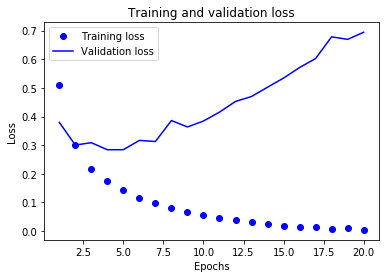

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

# 新闻分类：多分类问题

In [1]:
# 1.数据集

import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import reuters

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

train_data.shape,train_labels.shape

((8982,), (8982,))

In [4]:
word_index=reuters.get_word_index()
reversed_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_news=' '.join([reversed_word_index.get(i-3,'?') for i in train_data[0]])

decoded_news

557056/550378 [==============================] - 15s 27us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
# 2.准备数据

def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return(results)

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels,dimension=46):
    results=np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return(results)

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [12]:
# 3.构建网络

from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [15]:
# 4.验证模型

x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 33s 4ms/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 171us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
E

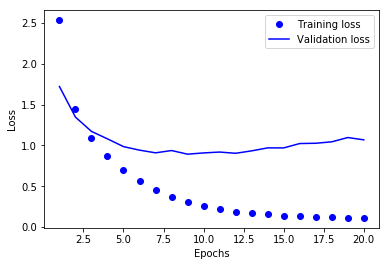

In [16]:
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

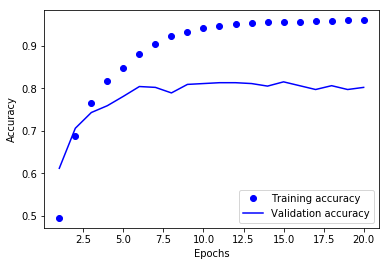

In [17]:
plt.clf()

acc=history.history['acc']
val_acc=history.history['val_acc']

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [22]:
# 网络在训练第9轮后开始过拟合，新模型共9个轮次

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val,y_val))



Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 246us/step - loss: 2.5043 - acc: 0.5459 - val_loss: 1.7318 - val_acc: 0.6320
Epoch 2/9
7982/7982 [==============================] - 1s 167us/step - loss: 1.3879 - acc: 0.7038 - val_loss: 1.2876 - val_acc: 0.7170
Epoch 3/9
7982/7982 [==============================] - 1s 170us/step - loss: 1.0521 - acc: 0.7712 - val_loss: 1.1364 - val_acc: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 166us/step - loss: 0.8371 - acc: 0.8216 - val_loss: 1.0412 - val_acc: 0.7950
Epoch 5/9
7982/7982 [==============================] - 1s 167us/step - loss: 0.6724 - acc: 0.8596 - val_loss: 0.9815 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 169us/step - loss: 0.5395 - acc: 0.8890 - val_loss: 0.9516 - val_acc: 0.7920
Epoch 7/9
7982/7982 [==============================] - 1s 167us/step - loss: 0.4396 - acc: 0.9083 - val_loss: 0.9023 - val_acc: 0.8110
Epoch 8

In [23]:
#测试集上验证

results=model.evaluate(x_test,one_hot_test_labels)
results

[0.9935073045779845, 0.7836153161175423]

In [27]:
# 预测

predictions=model.predict(x_test)

predictions[0],np.argmax(predictions[0])

(array([2.0914640e-05, 1.5936352e-05, 1.2225258e-05, 9.0246850e-01,
        9.2301205e-02, 1.6269027e-05, 7.3961826e-05, 4.9520655e-05,
        1.3454841e-03, 8.4041436e-05, 2.9849956e-05, 3.7295884e-04,
        7.2685485e-05, 9.1077556e-05, 2.9529159e-05, 3.1429547e-05,
        2.6189059e-04, 1.4521232e-05, 1.3545730e-04, 4.1303239e-04,
        8.5276208e-04, 3.3067859e-04, 3.4306569e-05, 9.0601257e-05,
        1.2104997e-05, 8.8066654e-06, 4.4330018e-06, 5.5556607e-06,
        2.0529657e-04, 1.1212683e-04, 9.0458110e-05, 2.3181681e-05,
        1.9848671e-06, 1.9244139e-06, 1.1234693e-05, 3.6828857e-05,
        2.7466725e-05, 3.6772490e-05, 1.6432850e-05, 1.3154790e-04,
        1.6967326e-05, 5.8496240e-05, 5.4693405e-06, 6.6761709e-06,
        6.6141797e-06, 3.0766700e-05], dtype=float32), 3)

# 波士顿房价数据集

In [28]:
#  1.数据集

from keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

57344/57026 [==============================] - 1s 11us/step


In [30]:
train_data.shape,test_data.shape

((404, 13), (102, 13))

In [32]:
train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [34]:
# 2.准备数据

# 数据标准化
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std

test_data-=mean
test_data/=std

In [35]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [36]:
# 3.构建模型

from keras import models
from keras import layers
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',
                 loss='mse',
                 metrics=['mae'])
    return(model)

In [38]:
# 4.用K折验证法来验证模型

import numpy as np 
k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]

for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data=np.concatenate([train_data[:i*num_val_samples],
                                      train_data[(i+1)*num_val_samples:]],
                                     axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],
                                          train_targets[(i+1)*num_val_samples:]],
                                         axis=0)
    model=build_model()
    model.fit(partial_train_data,partial_train_targets,
              epochs=num_epochs,batch_size=1,verbose=0)
    val_mse,val_mae=model.evaluate(val_data,val_targets)
    all_scores.append(val_mae)

processing fold # 0
101/101 [==============================] - 0s 869us/step
processing fold # 1
101/101 [==============================] - 0s 986us/step
processing fold # 2
101/101 [==============================] - 0s 1ms/step
processing fold # 3
101/101 [==============================] - 0s 1ms/step


In [39]:
predicted=model.predict(test_data)
predicted-test_targets

array([[780.48249512, 768.88249512, 768.68249512, ..., 737.68249512,
        760.98249512, 762.68249512],
       [ 49.61941605,  38.01941605,  37.81941605, ...,   6.81941605,
         30.11941605,  31.81941605],
       [956.1381958 , 944.5381958 , 944.3381958 , ..., 913.3381958 ,
        936.6381958 , 938.3381958 ],
       ...,
       [133.7563446 , 122.1563446 , 121.9563446 , ...,  90.9563446 ,
        114.2563446 , 115.9563446 ],
       [495.19627075, 483.59627075, 483.39627075, ..., 452.39627075,
        475.69627075, 477.39627075],
       [248.07633667, 236.47633667, 236.27633667, ..., 205.27633667,
        228.57633667, 230.27633667]])

In [41]:
# 预测值与实际值之间的差别较大
# 增加训练轮次
# 保存每折的验证结果

num_epochs=500
all_mae_histories=[]

for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data=np.concatenate([train_data[:i*num_val_samples],
                                      train_data[(i+1)*num_val_samples:]],
                                     axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],
                                          train_targets[(i+1)*num_val_samples:]],
                                         axis=0)
    model=build_model()
    history=model.fit(partial_train_data,partial_train_targets,
                      validation_data=(val_data,val_targets),
                      epochs=num_epochs,batch_size=1,verbose=0)
    mae_history=history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [43]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) 
                     for i in range(num_epochs)]

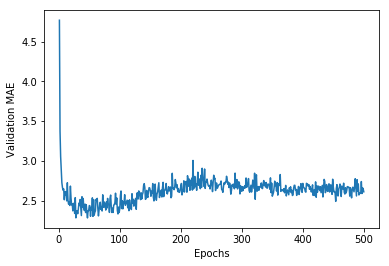

In [44]:
plt.clf()
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

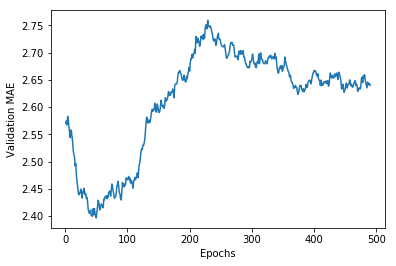

In [45]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [48]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=50, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 2ms/step


In [49]:
test_mae_score

812.6914984011182